# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

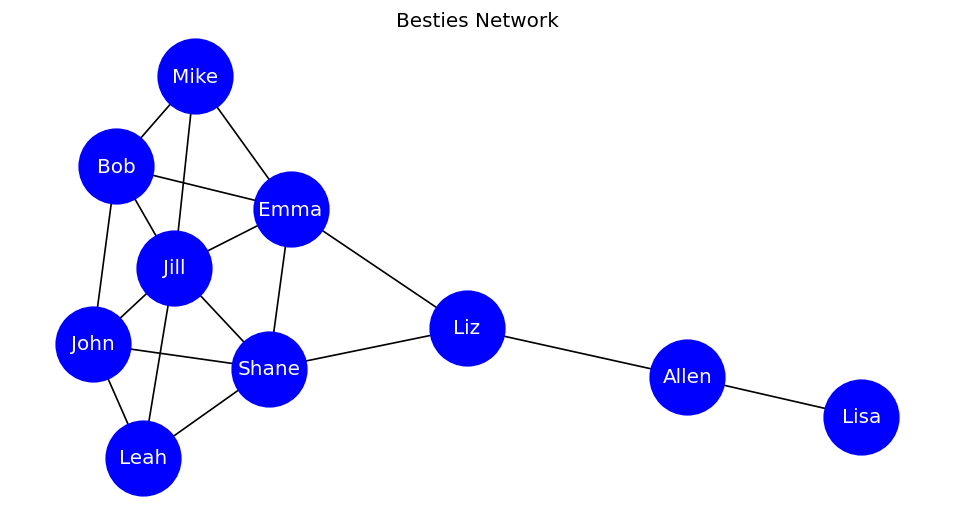

In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph()
addNodes = ['Bob', 'Mike', 'Jill', 'John', 'Leah', 'Shane', 'Emma', 'Liz', 'Allen', 'Lisa']
addEdges = [('Bob', 'Mike'), ('Bob', 'Jill'), ('Bob', 'John'), ('Bob', 'Emma'),
            ('John', 'Jill'), ('John','Shane'), ('John', 'Leah'),
            ('Jill', 'Leah'), ('Jill', 'Shane'), ('Jill', 'Emma'),
            ('Leah', 'Shane'),
            ('Mike', 'Emma'), ('Mike', 'Jill'),
            ('Emma', 'Shane'), ('Emma', 'Liz'),
            ('Shane', 'Liz'), ('Liz', 'Allen'), ('Allen', 'Lisa')
]
G.add_nodes_from(addNodes)
G.add_edges_from(addEdges)
my_pos = nx.spring_layout(G, seed = 100)

plt.figure(figsize=(10,5), dpi = 120)
plt.title('Besties Network')
nx.draw(G,
        pos=my_pos,
        with_labels=True,
        node_color='blue',
        node_size=2000,
        font_color='white',
        font_size=12,
        )
plt.show()

In [124]:
nodes = G.number_of_nodes()
edges = G.number_of_edges()

D = nx.diameter(G) # network diameter
nd = (edges)/((nodes*(nodes-1))/2)  # network density
degree = edges/nodes

print('Diameter:\t\t',D)
print('Network Density:\t',nd)
print('Average Degree:\t\t',degree)


Diameter:		 4
Network Density:	 0.4
Average Degree:		 1.8


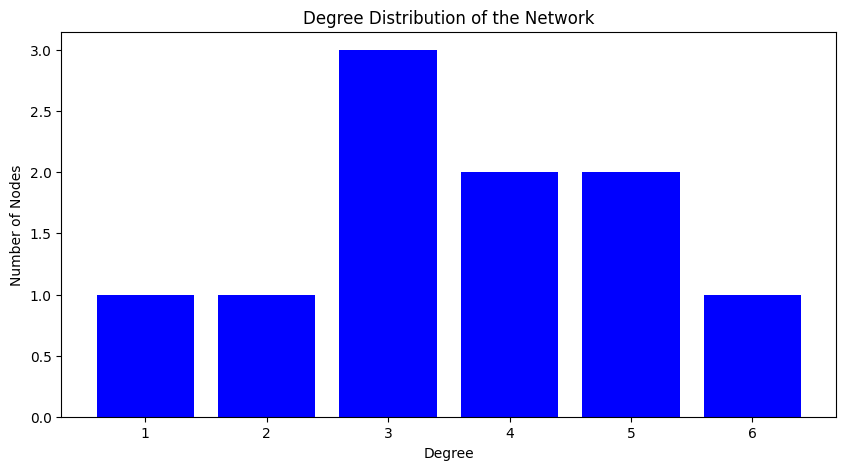

In [125]:
degree_counts = {}

for node, degree in G.degree():
  if degree in degree_counts:
    degree_counts[degree] += 1
  else:
    degree_counts[degree] = 1

degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

plt.figure(figsize=(10,5),dpi=100)
plt.bar(degrees, counts, color='blue')
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of the Network")
plt.show()

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [136]:
deg = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

df = pd.DataFrame(columns=['Name', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality'])
df = pd.DataFrame({'Name': G.nodes})
df['Degree Centrality'] = deg.values()
df['Betweenness Centrality'] = betweenness.values()
df['Closeness Centrality'] = closeness.values()


In [135]:
df.sort_values(by=['Degree Centrality'],ascending=False)    # sorted by degree centrality

,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality
2,Jill,0.666667,0.101852,0.600000
5,Shane,0.555556,0.231481,0.642857
6,Emma,0.555556,0.231481,0.642857
0,Bob,0.444444,0.023148,0.529412
3,John,0.444444,0.023148,0.529412
1,Mike,0.333333,0.000000,0.500000
4,Leah,0.333333,0.000000,0.500000
7,Liz,0.333333,0.388889,0.600000
8,Allen,0.222222,0.222222,0.428571
9,Lisa,0.111111,0.000000,0.310345


In [137]:
df.sort_values(by=['Betweenness Centrality'],ascending=False)   # sorted by betweenness centrality

,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality
7,Liz,0.333333,0.388889,0.600000
5,Shane,0.555556,0.231481,0.642857
6,Emma,0.555556,0.231481,0.642857
8,Allen,0.222222,0.222222,0.428571
2,Jill,0.666667,0.101852,0.600000
0,Bob,0.444444,0.023148,0.529412
3,John,0.444444,0.023148,0.529412
1,Mike,0.333333,0.000000,0.500000
4,Leah,0.333333,0.000000,0.500000
9,Lisa,0.111111,0.000000,0.310345


In [138]:
df.sort_values(by=['Closeness Centrality'],ascending=False)     # sorted by closeness centrality

,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality
5,Shane,0.555556,0.231481,0.642857
6,Emma,0.555556,0.231481,0.642857
2,Jill,0.666667,0.101852,0.600000
7,Liz,0.333333,0.388889,0.600000
0,Bob,0.444444,0.023148,0.529412
3,John,0.444444,0.023148,0.529412
1,Mike,0.333333,0.000000,0.500000
4,Leah,0.333333,0.000000,0.500000
8,Allen,0.222222,0.222222,0.428571
9,Lisa,0.111111,0.000000,0.310345


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.